In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import json
import sys 
import seaborn as sns
from scipy.stats import beta, gamma, norm, lognorm, expon, kstest, shapiro, anderson, cramervonmises, moment
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
path = 'C:\\Users\\joanb\\\Desktop\\data_incendios\\rho_distribution\\datos_distrib\\'

In [3]:
sample = []

for file in os.listdir(path):

    print(file)
    # Leemos el fichero y seleccionamos las variables de interés
    with open(os.path.join(path, file), 'r') as f:
        data = json.load(f)

    df = pd.json_normalize(data, 'data')
    sample.extend(df['viento'].to_list())
    
sample = np.array(sample, dtype=np.float64)

Benicarlo_2018.txt
Benicarlo_2019.txt
Benicarlo_2020.txt
Benicarlo_2021.txt
Benicarlo_2022.txt
Callosa_2018.txt
Callosa_2019.txt
Callosa_2020.txt
Callosa_2021.txt
Callosa_2022.txt
Carcaixent_2018.txt
Carcaixent_2019.txt
Carcaixent_2020.txt
Carcaixent_2021.txt
Carcaixent_2022.txt
Llutxent_2018.txt
Llutxent_2019.txt
Llutxent_2020.txt
Llutxent_2021.txt
Llutxent_2022.txt
Onda_2018.txt
Onda_2019.txt
Onda_2020.txt
Onda_2021.txt
Onda_2022.txt
Segorbe_2018.txt
Segorbe_2019.txt
Segorbe_2020.txt
Segorbe_2021.txt
Segorbe_2022.txt
Villena_2018.txt
Villena_2019.txt
Villena_2020.txt
Villena_2021.txt
Villena_2022.txt


In [4]:
sample = sample[~np.isnan(sample)]
sample.size

153952

(array([2.05160332e-01, 1.35453760e-01, 1.30766705e-01, 1.73677874e-01,
        2.01029731e-01, 1.48252203e-01, 1.24003648e-01, 1.14715145e-01,
        1.16363105e-01, 1.14993372e-01, 1.16555724e-01, 1.24281875e-01,
        1.14907764e-01, 1.09364625e-01, 1.03735878e-01, 8.90540521e-02,
        7.79463729e-02, 7.20608011e-02, 6.09103178e-02, 5.62446645e-02,
        5.40616524e-02, 4.98882469e-02, 4.98240407e-02, 4.50085728e-02,
        4.57148414e-02, 4.51797895e-02, 4.52225936e-02, 4.78550494e-02,
        3.81171033e-02, 3.43075332e-02, 3.25311606e-02, 3.11400254e-02,
        3.08832005e-02, 2.73732595e-02, 2.62817534e-02, 2.38847205e-02,
        2.14448835e-02, 2.03319754e-02, 1.74640967e-02, 1.72714780e-02,
        1.54308992e-02, 1.41253724e-02, 1.26486289e-02, 1.15143187e-02,
        1.14715145e-02, 1.07652459e-02, 9.88776065e-03, 9.30990451e-03,
        9.33130658e-03, 8.06858390e-03, 7.68334648e-03, 7.25530489e-03,
        6.69885083e-03, 6.52763419e-03, 6.03538637e-03, 5.928375

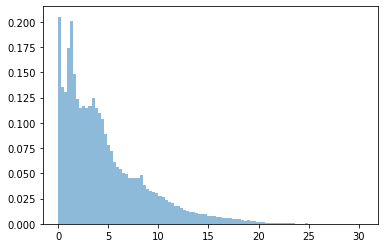

In [5]:
plt.hist(sample, density=True, alpha=0.5, bins=100)

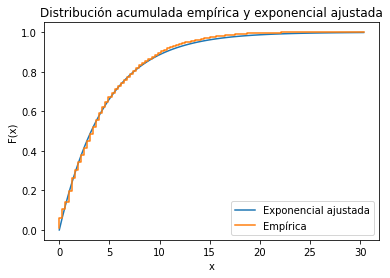

In [6]:

# Calcular la ECDF de la muestra
ecdf = ECDF(sample)

# Ajustar la distribución exponencial a los datos con MLE
params = expon.fit(sample)
dist = expon(*params)

# Evaluar la F(x) de la distribución ajustada y la ECDF en puntos específicos
x = np.linspace(min(sample), max(sample), num=100)
y_dist = dist.cdf(x)
y_ecdf = ecdf(x)

# Graficar la F(x) de la distribución ajustada y la ECDF
plt.plot(x, y_dist, label='Exponencial ajustada')
plt.step(x, y_ecdf, label='Empírica')
plt.title('Distribución acumulada empírica y exponencial ajustada')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.show()

In [7]:
# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(sample, 'expon', args=params)
print("Test de Kolmogorov-Smirnov para la distribución : KS statistic = {:.3f}, p-value = {:.3f}".format(ks_statistic, p_value))

Test de Kolmogorov-Smirnov para la distribución : KS statistic = 0.051, p-value = 0.000


In [8]:
print(params)

(0.0, 4.598431329245479)


In [9]:
lmbda = 1/params[1]
print(lmbda)

0.217465463415778


In [10]:
np.save('param_dist_rho.npy', params)